In [146]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

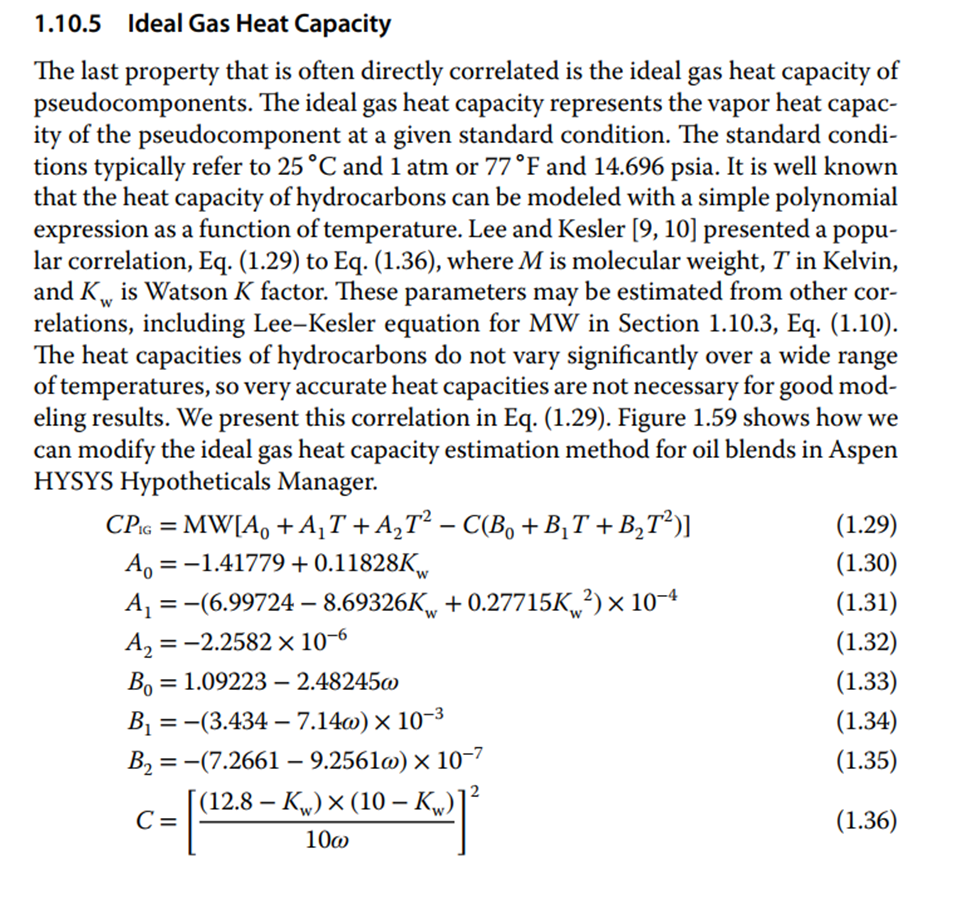

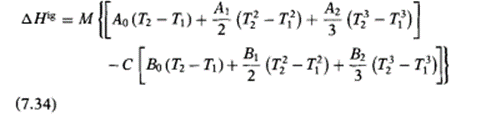

In [147]:
def H_ig(kw , w , T , T_ref , mwt): #T IN KELVIN  #joule/mole
    a0 = -1.41779 + 0.11828 * kw
    a1 = -1 * (6.99724 - 8.69326*kw + 0.27715*kw**2) * 10**(-4)
    a2 = -2.2582 * 10**(-6)

    b0 = 1.09223 - 2.48245*w
    b1 = -1 * (3.434 - 7.14*w) * 10**(-3)
    b2 = -1 * (7.2661 - 9.2561*w) * 10**(-7)

    c = ( ( (12.8-kw)*(10-kw) ) / (10*w) )**2

    delta_H_ig = mwt * ( 
                            ( a0*(T-T_ref) + 0.5*a1*(T**2 - T_ref**2) + a2*(1/3)*(T**3 - T_ref**3) )  
                        - c*(b0*(T-T_ref) + 0.5*b1*(T**2 - T_ref**2) +b2*(1/3)*(T**3 - T_ref**3)   ) 
                        )
    return delta_H_ig


In [148]:
H_ig(7.326647237
,
0.197383119
,
644.9,
298,
72.89469974
)

687795.1806795484

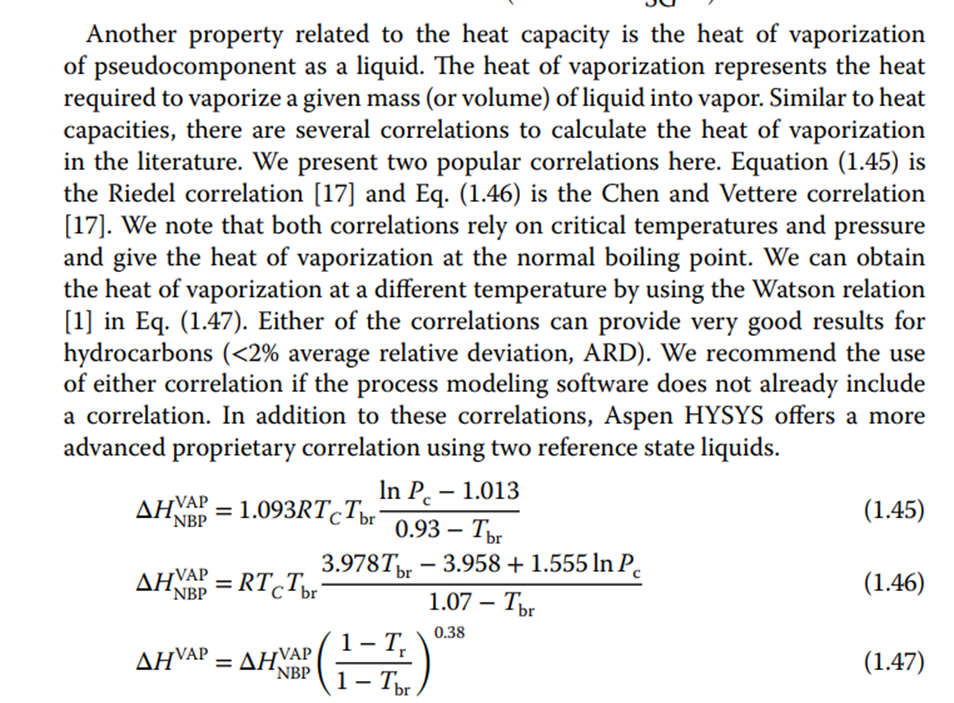

In [149]:
def lambda_(tc , t_bp , pc , t_stream):
    latent_heat_vap = 1.093 * 8.314 * tc * (t_bp / t_stream) * ( (np.log(pc) - 1.013 ) / ( 0.93 - (t_bp / t_stream) ) )
    return latent_heat_vap

In [150]:
lambda_(tc= 491.4023 , t_bp = 40+273 , pc = 3987857048 , t_stream = 300)

-867125.2711520628

In [151]:
def lambda_transform(tc , t_bp , pc , t_stream):
    lambda_nbp = lambda_(tc , t_bp , pc , t_stream)
    new_lambda = lambda_nbp * ( (1-(t_stream/tc) )/(1-(t_bp / tc))   )**(0.38)
    return new_lambda

In [152]:
lambda_transform(tc= 491.4023 , t_bp = 40+273 , pc = 3987857048 , t_stream = 298)

-847761.5699725673

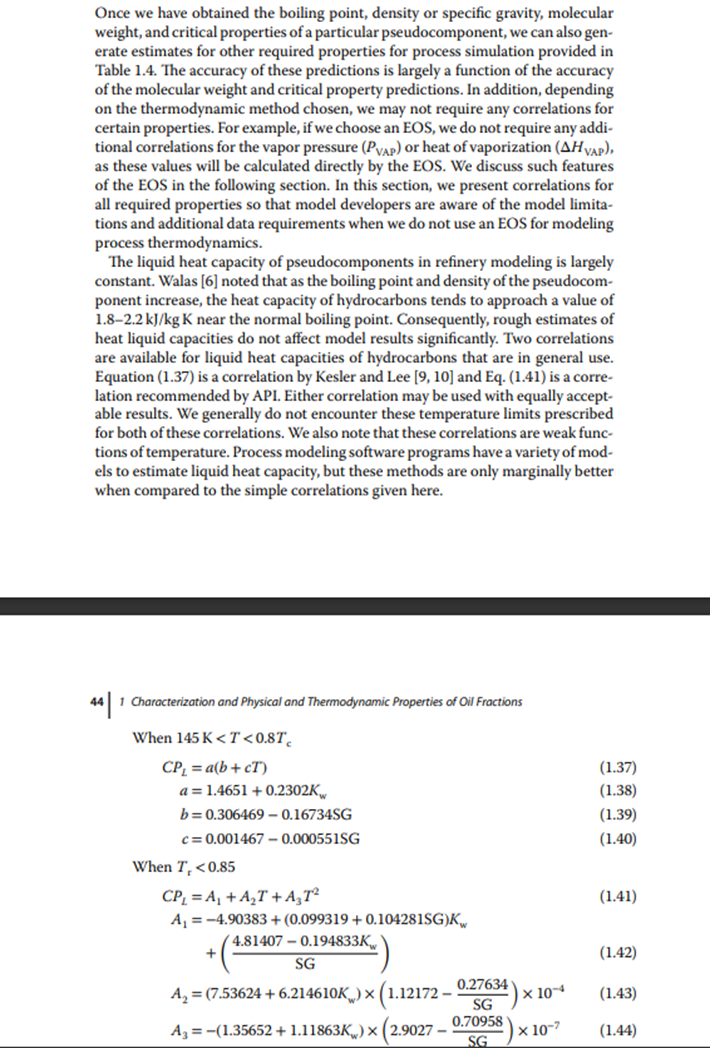

In [153]:
def H_liq(tc , T ,T_ref ,kw , sg ): #اتاكد من الوحدات
    
    tr = T / tc
    if 145 < T < 0.8 * tc:
        a = 1.4651 + 0.2302*kw
        b = 0.306469 - 0.16734*sg
        c = 0.001467 - 0.000551 * sg
        H_liq = a*b*(T - T_ref) + a * c * 0.5 *(T**2 - T_ref**2)
        return H_liq , "case 1"
    elif  tr< 0.85:
        a1 = -4.90383 + kw*(0.099319 + 0.104281*sg) + ((4.81407 - 0.194833*kw)/sg)
        a2 = (7.53621 + 6.21461 * kw) * (1.12172 - (0.27634/sg)) * 10**(-4)
        a3 = -1*(1.35652 + 1.11863*kw)* (2.9027 - (0.70958/sg)) * 10**(-7)
        H_liq = a1 * (T - T_ref) + a2 * 0.5 * (T**2 - T_ref**2) + a3 * (1/3) * (T**3 - T_ref**3)
        return H_liq , "case 2"
    
    else:
        return


In [154]:
H_liq(tc = 491.4023 , T = 35+273.15 ,T_ref = 25+273.15 ,kw = 10 , sg = 0.8 )

(18.22106828463, 'case 1')

In [155]:
import pandas as pd
import seaborn as sns

streams flow rates are in kmole/hr

In [156]:
df = pd.read_excel("D:\graduation project\hysys\Hysys data for EB.xlsx" , sheet_name= "pseudo_comp_sg_kw")

In [157]:
df.head()

,comp_name,sg,kw,NBP,MWT,w,tc (deg C),pc(bar),Unnamed: 8,Fresh CVGO,...,H2O,LE Cooled,Naphtha Cooled,Kerosee Cooled,CooledDiesel,Cooled Residue,Unnamed: 63,Temperature (deg c),Pressure(bar),stream name
0,36-40C*,0.636031,12.974475,39.999994,70.630119,0.189371,218.402289,39.366802,NaN,0.536586,...,0.0,6.806450e-09,0.004965,1.214828,0.000020,0.0,NaN,25.000000,1.0,Fresh CVGO
1,40-50C*,0.654499,12.741179,49.999994,72.894700,0.197383,223.759570,38.358814,NaN,1.073667,...,0.0,1.026918e-09,0.002036,1.354312,0.000167,0.0,NaN,25.000000,1.0,CVGO Feed
2,50-60C*,0.677175,12.440263,59.999994,77.509713,0.213967,234.367448,36.488491,NaN,2.079792,...,0.0,1.461286e-10,0.000788,1.423989,0.001299,0.0,NaN,25.000000,1.0,.
3,60-70C*,0.695490,12.232668,69.999994,82.237970,0.231179,244.849444,34.786198,NaN,3.764661,...,0.0,2.057040e-11,0.000301,1.481164,0.009982,0.0,NaN,370.000000,2.0,Heated Feed
4,70-80C*,0.709443,12.107452,79.999994,87.079374,0.248902,255.221266,33.226142,NaN,6.340447,...,0.0,2.783879e-12,0.000111,1.481152,0.073748,0.0,NaN,375.387746,130.0,Pumped Feed


<Axes: >

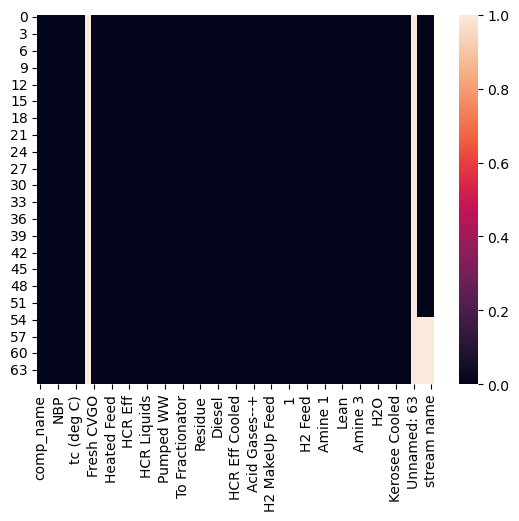

In [158]:
sns.heatmap(df.isna())

In [159]:
df_streams = df[["Temperature (deg c)" , "Pressure(bar)" , "stream name"]].dropna()
df_streams

,Temperature (deg c),Pressure(bar),stream name
0,25.000000,1.000000,Fresh CVGO
1,25.000000,1.000000,CVGO Feed
2,25.000000,1.000000,.
3,370.000000,2.000000,Heated Feed
4,375.387746,130.000000,Pumped Feed
5,378.474530,129.559040,To Cracker
6,371.857319,128.918501,HCR Eff
7,65.560000,130.000000,H2 Purge
8,100.000000,128.418501,HPS Vapours
9,100.000000,128.418501,HCR Liquids


In [160]:
df_streams.columns

Index(['Temperature (deg c)', 'Pressure(bar)', 'stream name'], dtype='object')

In [161]:
rows = []
for i , j in enumerate(df["comp_name"]):
    rows.append(df["comp_name"][i])

rows

['36-40C*',
 '40-50C*',
 '50-60C*',
 '60-70C*',
 '70-80C*',
 '80-90C*',
 '90-100C*',
 '100-110C*',
 '110-120C*',
 '120-130C*',
 '130-140C*',
 '140-150C*',
 '150-160C*',
 '160-170C*',
 '170-180C*',
 '180-190C*',
 '190-200C*',
 '200-210C*',
 '210-220C*',
 '220-230C*',
 '230-240C*',
 '240-250C*',
 '250-260C*',
 '260-270C*',
 '270-280C*',
 '280-290C*',
 '290-300C*',
 '300-310C*',
 '310-320C*',
 '320-330C*',
 '330-340C*',
 '340-350C*',
 '350-360C*',
 '360-370C*',
 '370-380C*',
 '380-390C*',
 '390-400C*',
 '400-410C*',
 '410-420C*',
 '420-430C*',
 '430-440C*',
 '440-450C*',
 '450-460C*',
 '460-480C*',
 '480-500C*',
 '500-520C*',
 '520-540C*',
 '540-560C*',
 '560-580C*',
 '580-600C*',
 '600-625C*',
 '625-650C*',
 '650-675C*',
 '675-700C*',
 '700-725C*',
 '725-750C*',
 '750-775C*',
 '775-800C*',
 '800-825C*',
 '825-850C*',
 '850-875C*',
 '875-900C*',
 '900-925C*',
 '925-950C*',
 '950-975C*',
 '975-1000C*']

In [162]:
columns = []
for i , j in enumerate(df["stream name"]):
    columns.append(df["stream name"][i])

columns = columns[0:54]
columns

['Fresh CVGO',
 'CVGO Feed',
 '.',
 'Heated Feed',
 'Pumped Feed',
 'To Cracker',
 'HCR Eff',
 'H2 Purge',
 'HPS Vapours',
 'HCR Liquids',
 'Wash Water',
 'Throttled Vapours',
 'Pumped WW',
 'Washed Stream',
 'Off Gases',
 'To Fractionator',
 'Light Ends',
 'Water',
 'Residue',
 'Naphtha',
 'Kerosene',
 'Diesel',
 'Rich Amine',
 'Lean Amine',
 'HCR Eff Cooled',
 'CVGO Feed 1',
 'MPS Liq',
 'Acid Gases--+',
 'To absorber',
 'LP Stream',
 'H2 MakeUp Feed',
 'Acid Gases---',
 'Sweet Gases',
 1,
 '2-',
 '2+',
 'H2 Feed',
 3,
 4,
 'Amine 1',
 'Amine 2',
 'Acid Gases',
 'Lean',
 'Cooled Lean',
 'Amine 4',
 'Amine 3',
 'MEA MU 1',
 'Amine Recycle',
 'H2O',
 'LE Cooled',
 'Naphtha Cooled',
 'Kerosee Cooled',
 'CooledDiesel',
 'Cooled Residue']

In [163]:
results = pd.DataFrame(columns = columns , index=rows )
results

,Fresh CVGO,CVGO Feed,.,Heated Feed,Pumped Feed,To Cracker,HCR Eff,H2 Purge,HPS Vapours,HCR Liquids,...,Amine 4,Amine 3,MEA MU 1,Amine Recycle,H2O,LE Cooled,Naphtha Cooled,Kerosee Cooled,CooledDiesel,Cooled Residue
36-40C*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40-50C*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50-60C*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60-70C*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70-80C*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875-900C*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900-925C*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
925-950C*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950-975C*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
df.columns

Index([          'comp_name',                  'sg',                  'kw',
                       'NBP',                 'MWT',                   'w',
                'tc (deg C)',             'pc(bar)',          'Unnamed: 8',
                'Fresh CVGO',           'CVGO Feed',                   '.',
               'Heated Feed',         'Pumped Feed',          'To Cracker',
                   'HCR Eff',            'H2 Purge',         'HPS Vapours',
               'HCR Liquids',          'Wash Water',   'Throttled Vapours',
                 'Pumped WW',       'Washed Stream',           'Off Gases',
           'To Fractionator',          'Light Ends',               'Water',
                   'Residue',             'Naphtha',            'Kerosene',
                    'Diesel',          'Rich Amine',          'Lean Amine',
            'HCR Eff Cooled',         'CVGO Feed 1',             'MPS Liq',
             'Acid Gases--+',         'To absorber',           'LP Stream',
            

In [174]:
df.loc["40-50C*" , "Fresh CVGO"]

KeyError: '40-50C*'

In [166]:
for i , j in enumerate(df_streams["stream name"]):

    t_stream = df_streams["Temperature (deg c)"].iloc[i]
    p_stream = df_streams["Pressure(bar)"].iloc[i]
    

    for l , k in enumerate(df["comp_name"]):
        tc = df["tc (deg C)"].iloc[l]
        pc = df["pc(bar)"].iloc[l]
        w  = df["w"].iloc[l]
        mwt= df["MWT"].iloc[l]
        kw = df["kw"].iloc[l]
        nbp= df["NBP"].iloc[l]
        sg = df["sg"]
        n  = df.loc[l , j]

        lambda_nbp = lambda_(tc +273.15 , nbp + 273.15 , pc , t_stream + 273.15)
        lambda_tref= lambda_transform(tc +273.15 , nbp + 273.15 , pc , 298)
        delta_H_ig = H_ig(kw , w , t_stream +273.15 , 298 , mwt)
        tot_H_ideal= n*(delta_H_ig + lambda_tref)  #kj/hr

        #h_res_ , z_vap , q , I , tr , alpha  , H_res_RT , error_ , dq_dtr   = H_residual('pr' , t_stream+273.15 , tc+273.15 , p_stream , pc  , Z_vap , beta_q  , w)

        results.loc[k , j] = tot_H_ideal


In [167]:
results.to_excel("D:/graduation project/hysys/ideal enthalpy for pseudo comp.xlsx")


<Axes: >

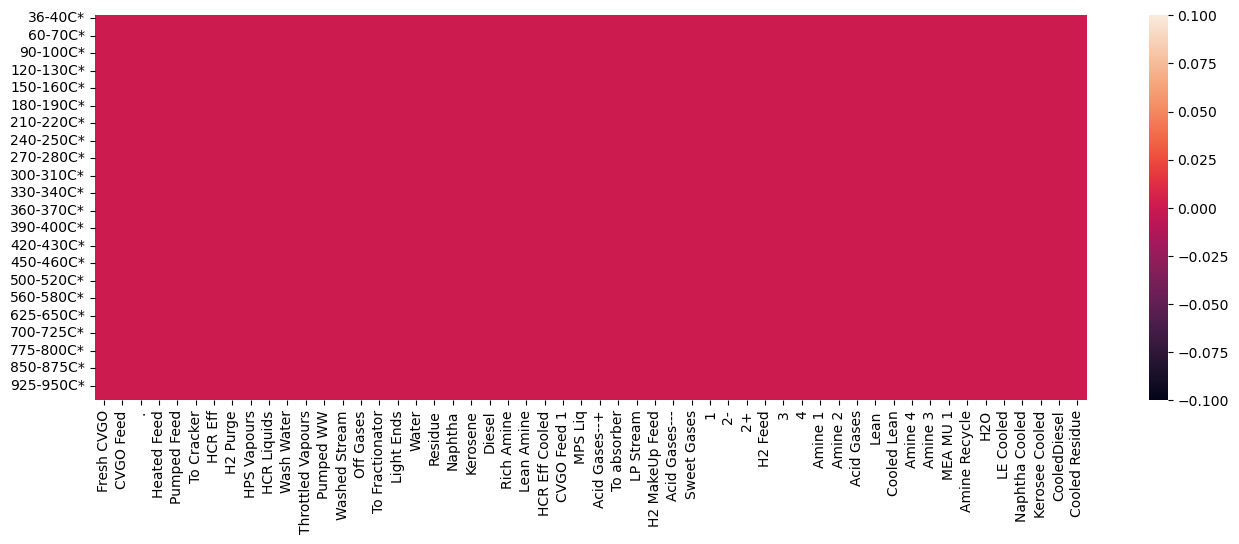

In [168]:
plt.figure(figsize=(16,5))
sns.heatmap(results.isna())

In [169]:
results

,Fresh CVGO,CVGO Feed,.,Heated Feed,Pumped Feed,To Cracker,HCR Eff,H2 Purge,HPS Vapours,HCR Liquids,...,Amine 4,Amine 3,MEA MU 1,Amine Recycle,H2O,LE Cooled,Naphtha Cooled,Kerosee Cooled,CooledDiesel,Cooled Residue
36-40C*,-57176.349384,-57176.349384,-0.0,-25612.481663,-24986.460406,-50607.441971,-57755.020283,-0.0,-41.408306,-117980.11119,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000679,-521.206846,-125710.635409,-2.108172,-0.0
40-50C*,-94397.869498,-94397.869498,-0.0,-31323.808458,-30080.152425,-34431.513425,-39043.949482,-0.0,-23.999043,-105862.009048,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000083,-175.794536,-114882.913124,-14.199062,-0.0
50-60C*,-158040.304654,-158040.304654,-0.0,-27339.522317,-24712.980548,-14982.379667,-18129.213529,-0.0,-13.572303,-93634.646927,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.00001,-58.553547,-103628.573158,-94.549753,-0.0
60-70C*,-254876.751315,-254876.751315,-0.0,-2564.735502,2571.421514,2091.101342,-316.096568,-0.0,-7.780284,-84806.377505,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000001,-19.886558,-95301.301357,-642.268907,-0.0
70-80C*,-390708.313102,-390708.313102,-0.0,56631.507543,65764.553686,16848.182297,14660.422853,-0.0,-4.505781,-78145.956154,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-6.632661,-86057.605543,-4284.897519,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875-900C*,0.0,0.0,0.0,0.0,0.0,82198.292244,184432.113292,987.574591,25451.168194,6985.605497,...,0.0,0.0,0.0,0.0,0.0,4948.611182,0.0,0.0,0.0,0.0
900-925C*,0.0,0.0,0.0,0.0,0.0,70695.245748,146932.990208,465.777054,16349.779603,10046.226641,...,0.0,0.0,0.0,0.0,0.0,7191.474873,0.0,0.0,0.0,0.0
925-950C*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
950-975C*,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
